In [1]:
# Homework 2 Part 1 (due 7/07/2024)

# Multivariate linear regression with within-sample validation

### Objective
In this project, you will identify relationships between variables via single-variable and multivariable linear regression using the python library `sci-kit learn`. You will practice assessing the model fit within sample and out of sample.

### Step 1
The following code snippet (1) loads the diabetes dataset from the sci-kit learn package, (2) fits a linear regression to the first variable in that data set, (3) calculate a t statistics for the estimated model parameters, (4) calculates the within-sample R2, and (5) plots the data and the model. Review and test the code.

### Step 2
Write code that  fits a linear models for EACH INDEPENDENT VARIABLE in the data set. For each of the resulting models, (1) calculate a t statistic for the estimated model parameters, (2) calculate the within-sample RSS, MSE, RSE, and R^2. Plot the results for the model that has the best quality of fit.

### Step 3
Write code that  fits a multivariate linear model for ALL INDEPENDENT VARIABLE in the data set. (1) calculate an f statistic on the estimated model parameters, (2) calculate the within-sample RSS, MSE, RSE, and R^2.

### Step 4
Test the information content of each variable in the multivariate model by calculating an f statistic with respect to a reduced model. Are the three variables with the highest f statistic also the variables with the best-fitting single-variable models? Explain what may lead to differences in the variable rankings.

### Step 5
Look up how to use the function `train_test_split` from `sklearn.model_selection` split a dataset into a training set and a test set. Repeat steps 2 and 3 on the training set. For each model, also calculate RSS, MSE, RSE, and R2 on the test set. For each linear model, comment on how RSE and R2 change when moving from the training set to the test.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [3]:
# Read-in the diabetes dataset as a pandas DataFrame
diabetes = datasets.load_diabetes(as_frame=True)

# Get independent variables
X = diabetes.data

# Get dependent variable
y = diabetes.target

# Let's look at the data
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


R2 0.03530218264671636


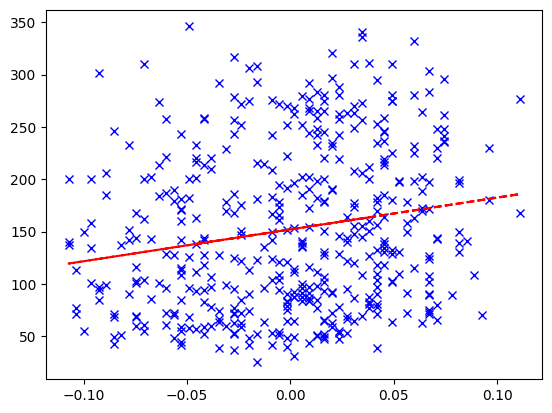

In [4]:
# initialize model
model = LinearRegression()

# get variable names from column header in the data frame
var_names = X.columns

# select first variable
var_name1 = var_names[0]

# select data associated with the first variable
x1 = X[var_name1]

# turn that dataframe column into a nx1 numpy array
x1_data = np.array([x1.to_numpy()]).T

# fit model
_ = model.fit(x1_data,y.to_numpy())

# get model predictions for each x value
yHat = model.predict(x1_data)

# get residuals
resid = yHat-y

# get R2 value
R2 = model.score(x1_data,y)
print('R2', R2)

# make a plot
plt.subplot(111)

# plot data
plt.plot(x1, y, marker='x', lw=0, color='blue')

# plot fit
plt.plot(x1, yHat, ls='--', color='red');

Step 2
Write code that fits a linear models for EACH INDEPENDENT VARIABLE in the data set. For each of the resulting models, (1) calculate a t statistic for the estimated model parameters, (2) calculate the within-sample RSS, MSE, RSE, and R^2. Plot the results for the model that has the best quality of fit.

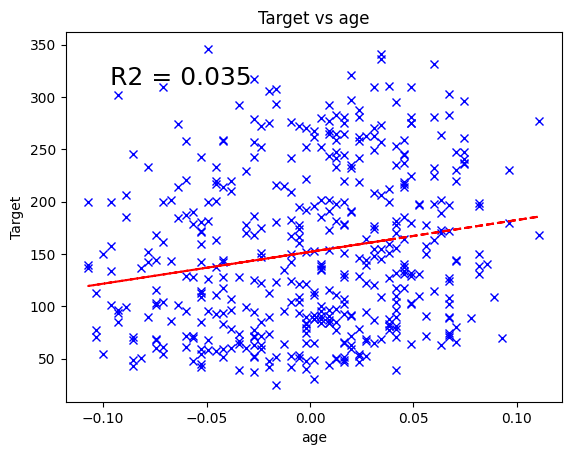

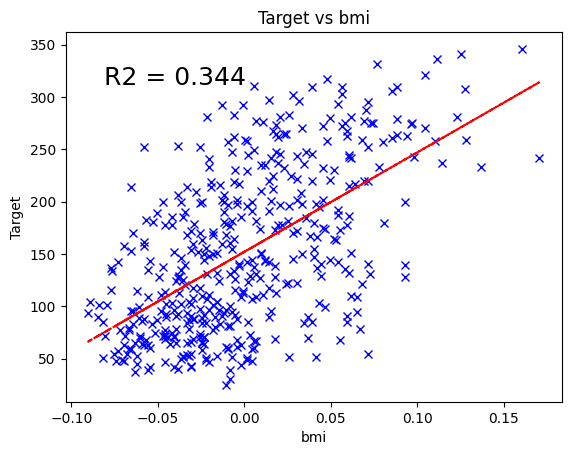

Variable: age, t-statistic: 4.012651743018033, RSS: 2528481.7816048963, MSE: 5720.5470172056475, RSE: 75.6342978892886, R2: 0.03530218264671636
Variable: sex, t-statistic: 0.9041147550244749, RSS: 2616148.8936170214, MSE: 5918.888899586022, RSE: 76.9343154878629, R2: 0.0018543357106460823
Variable: bmi, t-statistic: 15.187289570365303, RSS: 1719581.8107738825, MSE: 3890.456585461273, RSE: 62.37352471570989, R2: 0.3439237602253802
Variable: bp, t-statistic: 10.32085901731463, RSS: 2110158.3448469597, MSE: 4774.113902368687, RSE: 69.09496293051099, R2: 0.1949061431435003
Variable: s1, t-statistic: 4.5508864462124485, RSS: 2503185.5056927945, MSE: 5663.315623739354, RSE: 75.25500397807015, R2: 0.04495353245556555
Variable: s2, t-statistic: 3.7075705216746386, RSS: 2541606.5673835794, MSE: 5750.241102677782, RSE: 75.83034420782872, R2: 0.030294651136685613
Variable: s3, t-statistic: -9.013304537113783, RSS: 2212502.436354108, MSE: 5005.661620710652, RSE: 70.75070049625411, R2: 0.1558585524

In [10]:
def linearReg(model, X, y):
    results = []

    var_names = X.columns

    for var_name in var_names:
        # select data associated with the variable
        xi = X[var_name]

        # turn that dataframe column into a nx1 numpy array
        xi_data = np.array([xi.to_numpy()]).T

        # fit model
        _ = model.fit(xi_data, y.to_numpy())

        # get model predictions for each x value
        yHat = model.predict(xi_data)

        # get residuals
        resid = yHat - y

        # calculate statistics
        n = len(y)
        RSS = np.sum(resid**2)
        MSE = RSS / n
        RSE = np.sqrt(MSE)
        R2 = model.score(xi_data, y)
        se = np.sqrt(RSS / (n - 2)) / np.sqrt(np.sum((xi - np.mean(xi))**2))
        t_stat = model.coef_[0] / se

        results.append((var_name, t_stat, RSS, MSE, RSE, R2))

        if R2 == max([r[5] for r in results]):
            plt.subplot(111)
            plt.plot(xi, y, marker='x', lw=0, color='blue')
            plt.plot(xi, yHat, ls='--', color='red')
            plt.title(f'Target vs {var_name}')
            plt.xlabel(var_name)
            plt.ylabel('Target')
            plt.text(0.9*xi.min(), 0.9*y.max(), f'R2 = {np.round(R2, 3)}', fontsize=18)
            plt.show()

    return results

# initialize model
model = LinearRegression()

# get results
results = linearReg(model, diabetes.data, diabetes.target)
for result in results:
    print(f'Variable: {result[0]}, t-statistic: {result[1]}, RSS: {result[2]}, MSE: {result[3]}, RSE: {result[4]}, R2: {result[5]}')


Step 3
Write code that fits a multivariate linear model for ALL INDEPENDENT VARIABLE in the data set. (1) calculate an f statistic on the estimated model parameters, (2) calculate the within-sample RSS, MSE, RSE, and R^2.

In [8]:
# Fit a multivariate linear model
model.fit(X, y)

# get model predictions for each x value
yHat = model.predict(X)

# get residuals
resid = yHat - y

# calculate statistics
n = len(y)
RSS = np.sum(resid**2)
MSE = RSS / n
RSE = np.sqrt(MSE)
R2 = model.score(X, y)
df_model = X.shape[1]
df_resid = n - df_model - 1
MSR = (np.sum((yHat - np.mean(y))**2)) / df_model
F_stat = MSR / (RSS / df_resid)

print('Multivariate Model')
print(f'RSS: {RSS}, MSE: {MSE}, RSE: {RSE}, R2: {R2}, F-statistic: {F_stat}')


Multivariate Model
RSS: 1263985.7856333435, MSE: 2859.69634758675, RSE: 53.47612876402657, R2: 0.5177484222203499, F-statistic: 46.2724395852433


Step 4
Test the information content of each variable in the multivariate model by calculating an f statistic with respect to a reduced model. Are the three variables with the highest f statistic also the variables with the best-fitting single-variable models? Explain what may lead to differences in the variable rankings.

In [13]:
def calc_f_stat(full_model, reduced_model, X_full, y, drop_column):
    y_full_hat = full_model.predict(X_full)
    RSS_full = np.sum((y - y_full_hat) ** 2)
    df_full = X_full.shape[1]

    X_reduced = X_full.drop(columns=[drop_column])
    y_reduced_hat = reduced_model.predict(X_reduced)
    RSS_reduced = np.sum((y - y_reduced_hat) ** 2)
    df_reduced = X_reduced.shape[1]

    F_stat = ((RSS_reduced - RSS_full) / (df_full - df_reduced)) / (RSS_full / (len(y) - df_full - 1))
    return F_stat

# fit the full model
full_model = LinearRegression().fit(X_full, y)

# calculate f-statistic for each variable
variables = X_full.columns
f_stats = []

for variable in variables:
    reduced_X = X_full.drop(columns=[variable])
    reduced_model = LinearRegression().fit(reduced_X, y)
    f_stat = calc_f_stat(full_model, reduced_model, X_full, y, variable)
    f_stats.append((variable, f_stat))

f_stats_sorted = sorted(f_stats, key=lambda x: x[1], reverse=True)

print("top variables by f-statistic:")
for var, f_stat in f_stats_sorted:
    print(f'variable: {var}, f-statistic: {f_stat}')

# calculate r2 for single-variable models
single_var_r2 = []
for variable in variables:
    single_var_model = LinearRegression().fit(X_full[[variable]], y)
    r2 = single_var_model.score(X_full[[variable]], y)
    single_var_r2.append((variable, r2))

single_var_r2_sorted = sorted(single_var_r2, key=lambda x: x[1], reverse=True)

print("\ntop 3 variables by single-variable models' r2:")
for var, r2 in single_var_r2_sorted[:3]:
    print(f'variable: {var}, r2: {r2}')

print("\ntop 3 variables by multivariate model f-statistics:")
for var, f_stat in f_stats_sorted[:3]:
    print(f'variable: {var}, f-statistic: {f_stat}')

top variables by f-statistic:
variable: bmi, f-statistic: 61.04769359493474
variable: bp, f-statistic: 24.58516062951425
variable: s5, f-statistic: 19.1004988002449
variable: sex, f-statistic: 15.34387717868028
variable: s1, f-statistic: 3.6144142390820386
variable: s2, f-statistic: 1.9773514814613802
variable: s4, f-statistic: 1.2023805393336846
variable: s6, f-statistic: 1.0504014225640101
variable: s3, f-statistic: 0.22603116815637952
variable: age, f-statistic: 0.028066721652920276

top 3 variables by single-variable models' r2:
variable: bmi, r2: 0.3439237602253802
variable: s5, r2: 0.32022310842972057
variable: bp, r2: 0.1949061431435003

top 3 variables by multivariate model f-statistics:
variable: bmi, f-statistic: 61.04769359493474
variable: bp, f-statistic: 24.58516062951425
variable: s5, f-statistic: 19.1004988002449


Step 5
Look up how to use the function train_test_split from sklearn.model_selection split a dataset into a training set and a test set. Repeat steps 2 and 3 on the training set. For each model, also calculate RSS, MSE, RSE, and R2 on the test set. For each linear model, comment on how RSE and R2 change when moving from the training set to the test.

In [15]:
from sklearn.model_selection import train_test_split

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=42)

# single variable linear regression
for var in X_full.columns:
    print("VARIABLE:", var)
    print(" ")
    # initialize model
    model = LinearRegression()

    # training set
    x_train = X_train[[var]]
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    train_resid = y_train_pred - y_train
    train_R2 = model.score(x_train, y_train)
    train_RSS = np.sum(train_resid ** 2)
    train_MSE = train_RSS / len(y_train)
    train_RSE = np.sqrt(train_MSE)

    print("For training data:")
    print('R2:', train_R2)
    print('RSS:', train_RSS)
    print('MSE:', train_MSE)
    print('RSE:', train_RSE)

    # test set
    x_test = X_test[[var]]
    y_test_pred = model.predict(x_test)
    test_resid = y_test_pred - y_test
    test_R2 = model.score(x_test, y_test)
    test_RSS = np.sum(test_resid ** 2)
    test_MSE = test_RSS / len(y_test)
    test_RSE = np.sqrt(test_MSE)

    print(" ")
    print("For test data:")
    print('R2:', test_R2)
    print('RSS:', test_RSS)
    print('MSE:', test_MSE)
    print('RSE:', test_RSE)
    print("-------------------- ")
    print(" ")

# multivariate linear regression
# initialize model
multivar_model = LinearRegression()

# fit model on training set
multivar_model.fit(X_train, y_train)

# training set
y_train_pred = multivar_model.predict(X_train)
train_resid = y_train_pred - y_train
train_RSS = np.sum(train_resid ** 2)
train_MSE = train_RSS / len(y_train)
train_RSE = np.sqrt(train_MSE)
train_R2 = multivar_model.score(X_train, y_train)

print('Training Results:')
print('RSS:', train_RSS)
print('MSE:', train_MSE)
print('RSE:', train_RSE)
print('R2:', train_R2)

# test set
y_test_pred = multivar_model.predict(X_test)
test_resid = y_test_pred - y_test
test_RSS = np.sum(test_resid ** 2)
test_MSE = test_RSS / len(y_test)
test_RSE = np.sqrt(test_MSE)
test_R2 = multivar_model.score(X_test, y_test)

print(" ")
print('Test Results:')
print('RSS:', test_RSS)
print('MSE:', test_MSE)
print('RSE:', test_RSE)
print('R2:', test_R2)


VARIABLE: age
 
For training data:
R2: 0.0386160540134205
RSS: 2062138.2791851806
MSE: 5841.75149910816
RSE: 76.43135154573783
 
For test data:
R2: 0.008289640305771506
RSS: 467626.6458850044
MSE: 5254.231976236004
RSE: 72.48608125865272
-------------------- 
 
VARIABLE: sex
 
For training data:
R2: 5.0639903771965145e-05
RSS: 2144859.877585207
MSE: 6076.0903047739575
RSE: 77.94928033518948
 
For test data:
R2: -0.009027562540554923
RSS: 475792.321885036
MSE: 5345.981144775686
RSE: 73.11621670173919
-------------------- 
 
VARIABLE: bmi
 
For training data:
R2: 0.3657241273794126
RSS: 1360501.7661827644
MSE: 3854.11265207582
RSE: 62.081500079136454
 
For test data:
R2: 0.23335039815872138
RSS: 361502.5076360485
MSE: 4061.8259284949268
RSE: 63.73245584860925
-------------------- 
 
VARIABLE: bp
 
For training data:
R2: 0.1978207021301397
RSS: 1720649.324146736
MSE: 4874.360691633813
RSE: 69.81662188643772
 
For test data:
R2: 0.1734118396354255
RSS: 389765.66613534355
MSE: 4379.38950713